In [2]:
import numpy as np
from scipy import stats
from scipy.stats import t
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [3]:
df = pd.read_excel("C:/Users/michalsh/Downloads/WaterFowls.xlsx")

In [4]:
df.head()

,מזהה תימי,מספר תצפית,קוד ספירה,שנה,תאריך,שעה,שם מאגר-מים,water_level,צופה,צופים נוספים,...,שם,בוגרים לא מזוהים,זכרים בוגרים,נקבות בוגרות,צעירים,הערכה,"חישוב סה""כ",הערה,הערות- מאגר/ספירה,official date
0,NaN,210701.0,21063.0,2008,2008-01-18,NaN,אגם ירוחם,לא ידוע,NaN,NaN,...,אגמית,12,0,0,2,0,14,דייגים,NaN,0.0
1,NaN,210702.0,21063.0,2008,2008-01-18,NaN,אגם ירוחם,לא ידוע,NaN,NaN,...,אנפה אפורה,8,0,0,0,0,8,NaN,NaN,0.0
2,NaN,210703.0,21063.0,2008,2008-01-18,NaN,אגם ירוחם,לא ידוע,NaN,NaN,...,ביצנית לבנת-כנף,3,0,0,0,0,3,דייגים,NaN,0.0
3,NaN,210704.0,21063.0,2008,2008-01-18,NaN,אגם ירוחם,לא ידוע,NaN,NaN,...,ברווז אפור,2,0,0,0,0,2,NaN,NaN,0.0
4,NaN,210705.0,21063.0,2008,2008-01-18,NaN,אגם ירוחם,לא ידוע,NaN,NaN,...,ברכיה,0,21,28,0,0,49,NaN,NaN,0.0


In [5]:
for i in df.columns:
    print(i)

מזהה תימי
מספר תצפית
קוד ספירה
שנה
תאריך
שעה
שם מאגר-מים
water_level
צופה
צופים נוספים
X
Y
נקודה
שם
בוגרים לא מזוהים
זכרים בוגרים
נקבות בוגרות
צעירים
הערכה
חישוב סה"כ
הערה
הערות- מאגר/ספירה
official date


In [6]:
##renaming df:

df= df.rename(columns={"מזהה תימי": "timi_id",
                    "מספר תצפית": "id",
                    "שנה": "year",
                    "תאריך": "date",
                    "שעה": "time",
                    "שם מאגר-מים": "reservoir",
#                     "צופה": "observer",
#                     "צופים נוספים": "more_observers",
                    "שם": "species",
                    "בוגרים לא מזוהים": "adults",
                    "זכרים בוגרים": "males",
                    "נקבות בוגרות": "females",
                    "צעירים": "juveniles",
                    "הערכה": "estimation",
                    'חישוב סה"כ': "total",
                    "הערה": "notes",
                    "הערות- מאגר/ספירה": "notes_reservoir",
                        })



In [7]:

##subset of relevant data

df=df[["timi_id","id","year","date","time","reservoir",
       #"observer","more_observers",
       "species","adults","males",
        "females","juveniles","estimation",
        "total","notes","notes_reservoir"]]


df

,timi_id,id,year,date,time,reservoir,species,adults,males,females,juveniles,estimation,total,notes,notes_reservoir
0,NaN,210701.0,2008,2008-01-18,NaN,אגם ירוחם,אגמית,12,0,0,2,0,14,דייגים,NaN
1,NaN,210702.0,2008,2008-01-18,NaN,אגם ירוחם,אנפה אפורה,8,0,0,0,0,8,NaN,NaN
2,NaN,210703.0,2008,2008-01-18,NaN,אגם ירוחם,ביצנית לבנת-כנף,3,0,0,0,0,3,דייגים,NaN
3,NaN,210704.0,2008,2008-01-18,NaN,אגם ירוחם,ברווז אפור,2,0,0,0,0,2,NaN,NaN
4,NaN,210705.0,2008,2008-01-18,NaN,אגם ירוחם,ברכיה,0,21,28,0,0,49,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42243,4321218.0,NaN,2023,2023-01-13 00:00:00,08:08:30.533000,NaN,ברכיה,4,0,0,0,0,4,NaN,NaN
42244,4321185.0,NaN,2023,2023-01-13 00:00:00,08:08:44.643000,NaN,טבלן גמד,5,0,0,0,0,5,NaN,NaN
42245,4321299.0,NaN,2023,2023-01-13 00:00:00,08:09:52.857000,NaN,מרית,0,1,1,0,0,2,NaN,NaN
42246,4321685.0,NaN,2023,2023-01-13 00:00:00,08:10:49.062000,NaN,אגמיה,21,0,0,0,0,21,NaN,NaN


In [8]:
df.dtypes

timi_id            float64
id                 float64
year                 int64
date                object
time                object
reservoir           object
species             object
adults               int64
males                int64
females              int64
juveniles            int64
estimation           int64
total                int64
notes               object
notes_reservoir     object
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

timi_id                   float64
id                        float64
year                        int64
date               datetime64[ns]
time                       object
reservoir                  object
species                    object
adults                      int64
males                       int64
females                     int64
juveniles                   int64
estimation                  int64
total                       int64
notes                      object
notes_reservoir            object
dtype: object

In [10]:
df['year'].isnull().sum()


0

In [11]:
df['reservoir'].isnull().sum()


59

In [12]:
df = df[~df['reservoir'].isnull()]
df['reservoir'].isnull().sum()


0

In [13]:
df.describe()

,timi_id,id,year,adults,males,females,juveniles,estimation,total
count,7.609000e+03,34580.000000,42189.000000,42189.000000,42189.000000,42189.000000,42189.000000,42189.000000,42189.000000
mean,4.001023e+06,227990.500000,2015.932091,40.118846,3.987793,3.424258,0.232170,9.358814,57.131527
std,3.235464e+05,9982.530491,4.656139,246.000121,33.029381,30.668073,7.277917,110.951623,275.518865
min,3.671353e+06,210701.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,3.673753e+06,219345.750000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,4.280735e+06,227990.500000,2016.000000,4.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,4.322594e+06,236635.250000,2020.000000,20.000000,0.000000,0.000000,0.000000,0.000000,34.000000
max,4.333294e+06,245280.000000,2023.000000,33000.000000,1600.000000,2760.000000,700.000000,10000.000000,33000.000000


In [428]:
# reservoir_names=df['reservoir'].unique()

# for reservoir in reservoir_names:
#     reservoir_subset = df.loc[df['reservoir'] == reservoir]
# #     print(reservoir_subset)
#     a=reservoir_subset.groupby(['species','year'])['total'].agg(sum)[1:100]
#     a= pd.DataFrame(a)
# #     print(a)
# #     a.plot(kind='bar')
# #     plt.show()
# #     break()
# #     a=df.groupby(['reservoir','species','year'])['total'].agg(sum)[1:100]


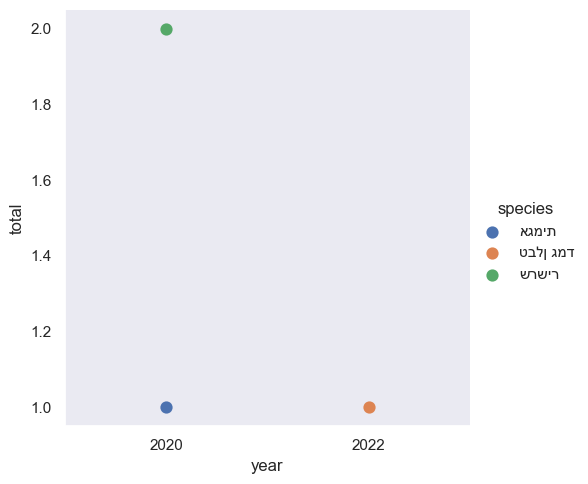

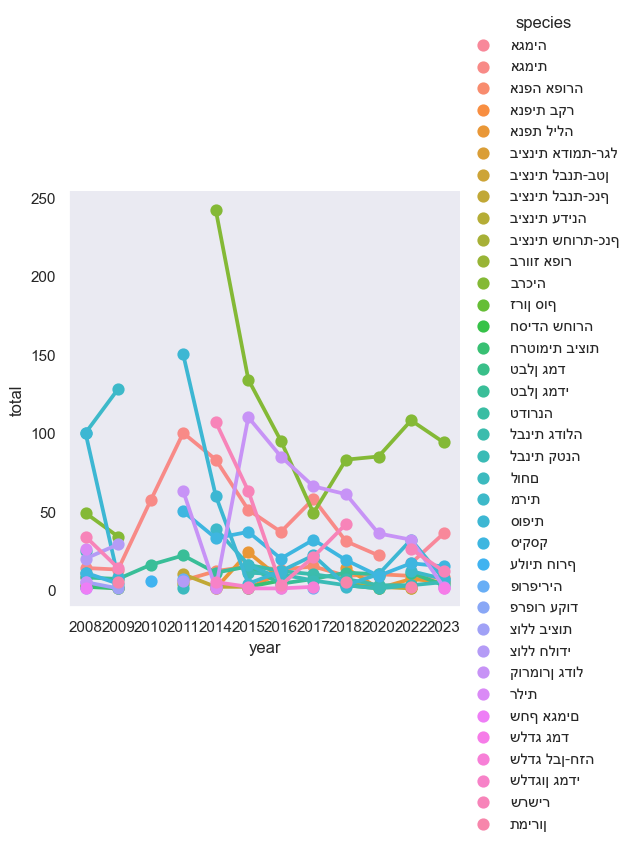

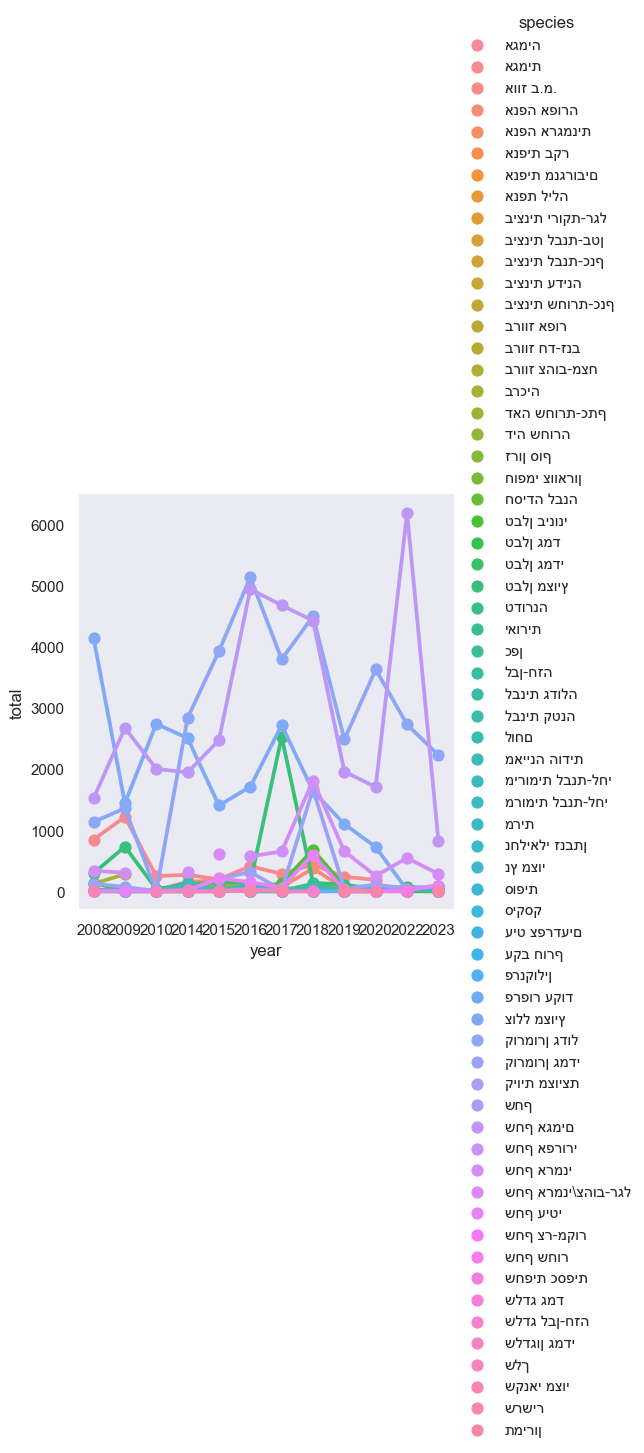

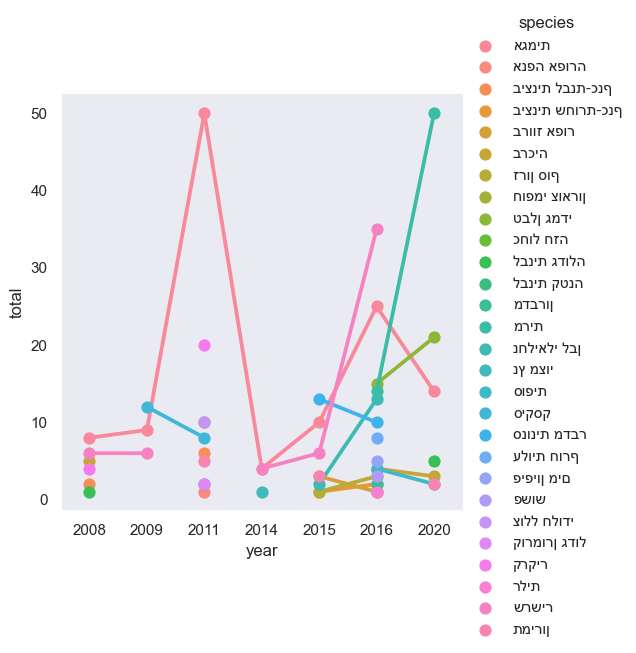

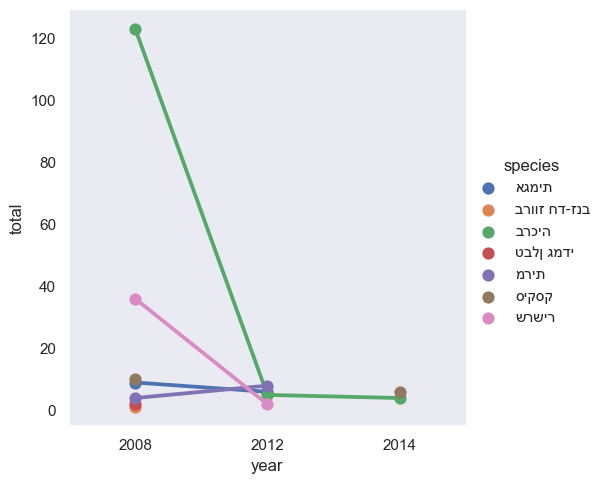

In [425]:
# d=pd.DataFrame({'c' : df.groupby(['reservoir','species','year']).size()}).reset_index()
d=pd.DataFrame({'total' : df.groupby(['reservoir','species','year'])['total'].agg(sum)}).reset_index()
d


reservoir_names=d['reservoir'].unique()[0:5]

for reservoir in reservoir_names:
    reservoir_subset = d.loc[d['reservoir'] == reservoir]
    sns.catplot(data=reservoir_subset, x="year", y="total", hue="species", kind="point")


#     print(reservoir_subset)


In [14]:
reservoir_subset
# d


NameError: name 'reservoir_subset' is not defined

In [15]:
# sns.relplot(data=reservoir_subset, x="year", y="total", hue="species", kind="line")
sns.catplot(data=reservoir_subset, x="year", y="total", hue="species", kind="point")

# e = df[0:100]
# sns.catplot(data=e, x="year", y="total", hue="species", kind="point",col='reservoir')



NameError: name 'reservoir_subset' is not defined

### QUESTIONS

1. which reservoirs had the biggest biodiversity: a- in total. b- in the last year.
    - are they similar?
    
    
2. for every species, are there decrease or increase in the total amount that was counted.

In [173]:

### 10 most biodiverse reservoirs:


reservoirs_species_df = pd.DataFrame
d=pd.DataFrame({'total' : df.groupby(['reservoir','species','year'])['total'].agg(sum)}).reset_index()


reservoirs_species_dict=dict()
reservoir_list=[]
species_n_list=[]

for reservoir in d['reservoir'].unique():
    reservoir_subset = d.loc[d['reservoir'] == reservoir]
    species_n= reservoir_subset.species.nunique()
    reservoir_list.append(reservoir)
    species_n_list.append(species_n)

reservoirs_species_dict=dict()
reservoirs_species_dict['reservoir']= reservoir_list
reservoirs_species_dict['species_count']= species_n_list

reservoirs_species_df = pd.DataFrame.from_dict(reservoirs_species_dict)
reservoirs_species_10_df = reservoirs_species_df.sort_values('species_count',ascending=False)[0:10]
reservoirs_species_df


,reservoir,species_count
0,אגם ברקנית,3
1,אגם ירוחם,37
2,אגם כנרת מאוחד,65
3,אגם נקרות,28
4,אגם עונתי רהט,7
...,...,...
417,"תלמי אלעזר, מאגר",47
418,"תנובות, מאגר",29
419,"תרצה צפון, ש.ט.",35
420,"תרצה, טלסקופ",38


In [142]:
### 10 most biodiverse reservoirs in 2023:

reservoirs_species_df = pd.DataFrame
d=pd.DataFrame({'total' : df.groupby(['reservoir','species','year'])['total'].agg(sum)}).reset_index()

d_2023 = d.loc[d['year']==2023]

reservoirs_species_dict=dict()
reservoir_list=[]
species_n_list=[]

for reservoir in d_2023['reservoir'].unique():
    reservoir_subset = d_2023.loc[d_2023['reservoir'] == reservoir]
    species_n= reservoir_subset.species.nunique()
    reservoir_list.append(reservoir)
    species_n_list.append(species_n)

reservoirs_species_dict=dict()
reservoirs_species_dict['reservoir']= reservoir_list
reservoirs_species_dict['species_count']= species_n_list

reservoirs_species_2023_df = pd.DataFrame.from_dict(reservoirs_species_dict)
reservoirs_species_2023_10_df = reservoirs_species_2023_df.sort_values('species_count',ascending=False)[0:10]



In [143]:
reservoirs_species_10_df

,reservoir,species_count
149,"טירת צבי, בריכות-מאגר",103
81,גוש חפציבה בית אלפא 2020,97
189,כפר רופין 2020,97
271,מעלה גלבוע 2020,85
407,תל יוסף 2020,81
117,"החולה, אגמון",80
129,"המעפיל, בריכות",80
328,עין הנציב 2020,79
242,מדגה מעין צבי-מעי לכביש 2,78
114,"הזורע, מאגרים",77


In [144]:
reservoirs_species_2023_10_df

,reservoir,species_count
79,"טירת צבי, בריכות-מאגר",53
153,מעלה גלבוע 2020,52
31,גוש חפציבה בית אלפא 2020,52
191,עין הנציב 2020,40
239,תל יוסף 2020,38
222,"רשפים, מאגר קר",37
238,"תימורים, מאגר",35
167,נווה איתן בריכות,34
100,"כפר מנחם, מאגר",33
174,ניר דוד 2020,33


In [252]:
#### check differences between this year to all years biodiversty

reservoirs_species_2023_10 =reservoirs_species_2023_10_df['reservoir'].values
reservoirs_species_2023_10

reservoirs_species_10 = reservoirs_species_10_df['reservoir'].values
reservoirs_species_10

##finding reservoirs that was most biodiverse all along the years, but not in 2023:
changed_reservoir_biodiversity_df = reservoirs_species_2023_df[(reservoirs_species_2023_df['reservoir'].isin(reservoirs_species_10)) &
                           (~reservoirs_species_2023_df['reservoir'].isin(reservoirs_species_2023_10))]
changed_reservoir_biodiversity_df
### plotting their results aling the years - to see if there's a decrese


,reservoir,species_count
55,"הזורע, מאגרים",26
57,"החולה, אגמון",26
66,"המעפיל, בריכות",22
105,כפר רופין 2020,32
137,מדגה מעין צבי-מעי לכביש 2,28


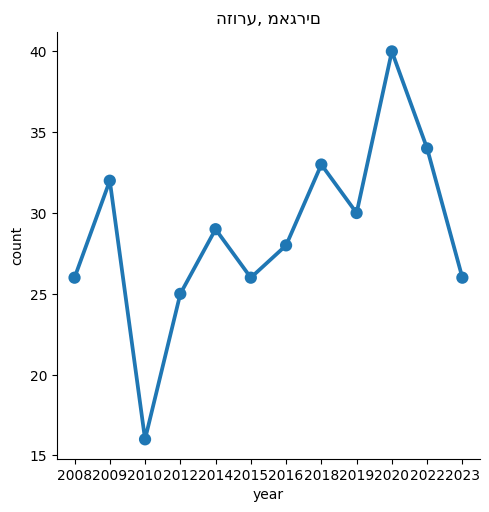

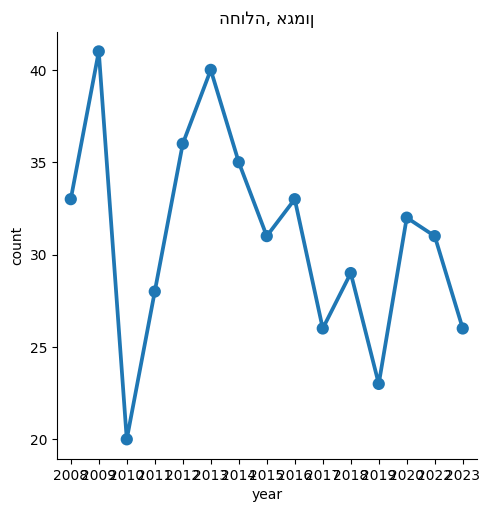

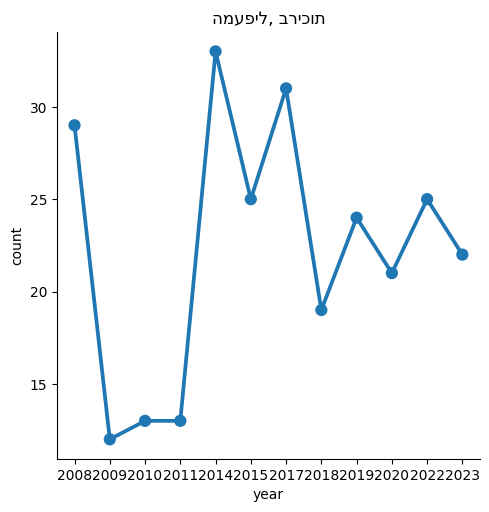

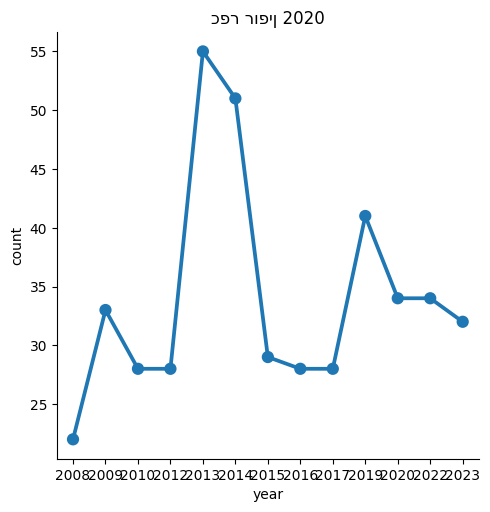

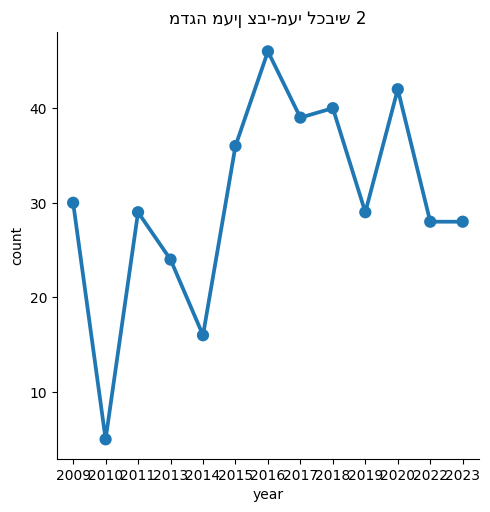

In [264]:
### plotting their results along the years - to see if there's a decrese

reservoirs_10= d[d['reservoir'].isin(reservoirs_species_10)]
a= pd.DataFrame({'count' : reservoirs_10.groupby(['reservoir','year'])['species'].count()}).reset_index()
a


for reservoir in changed_reservoir_biodiversity_df.reservoir.unique():
    b= a.loc[a.reservoir==reservoir]    
    sns.catplot(data=b, x= 'year', y='count', kind="point").set(title=reservoir)


There's an outlier - in 2010. I'll inspect the data without it

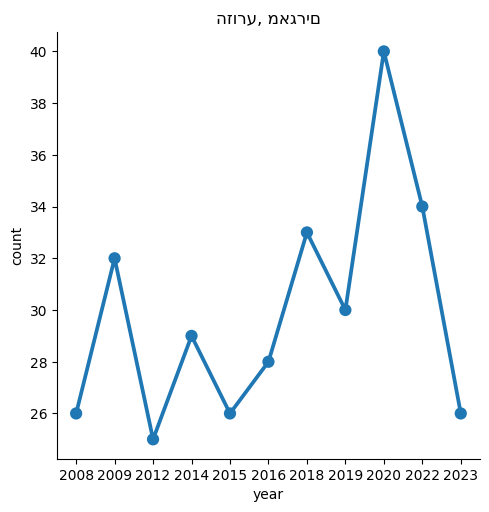

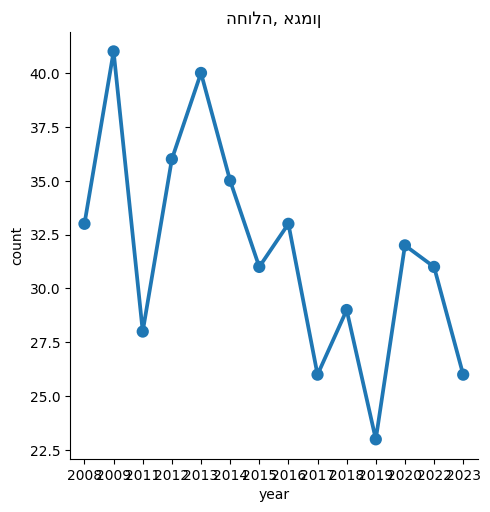

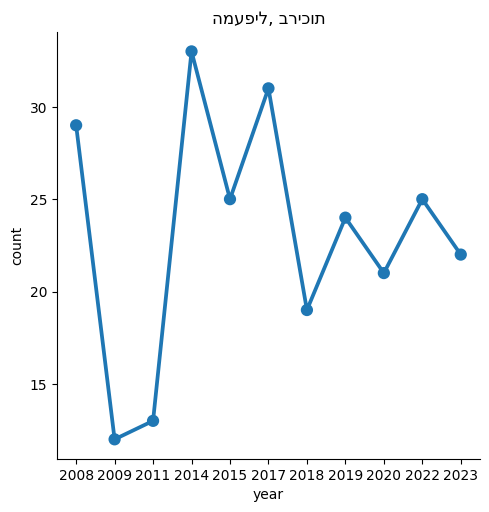

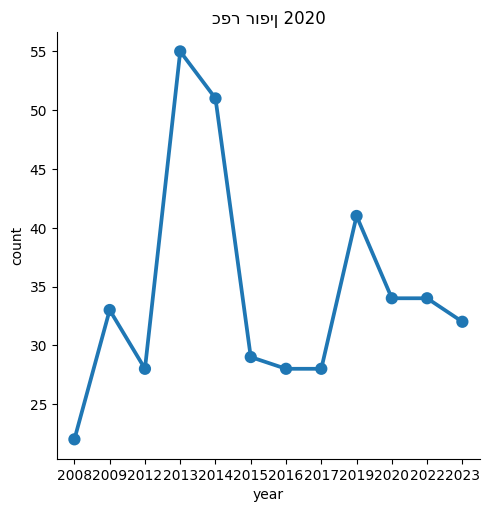

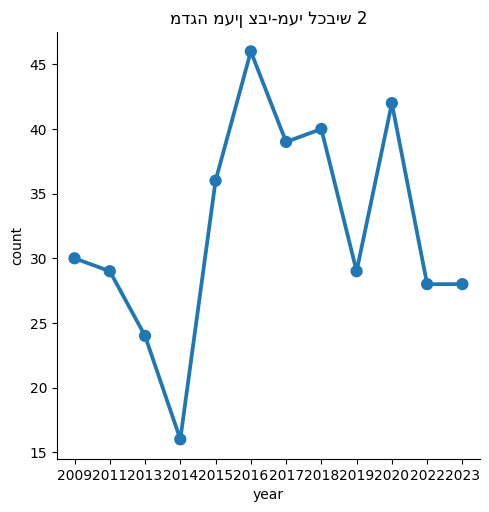

In [265]:
for reservoir in changed_reservoir_biodiversity_df.reservoir.unique():
    b= a.loc[a.reservoir==reservoir]    
    b= b.loc[b['year']!=2010]
    sns.catplot(data=b, x= 'year', y='count', kind="point").set(title=reservoir)
